In [1]:
import numpy as np
import scipy as sp
import csv
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
x = []
y = []
with open('CB_Lobes.txt') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        x.append(int(row[0]))
        y.append(int(row[1]))

In [3]:
vel = np.diff(y)
acc = np.diff(vel)

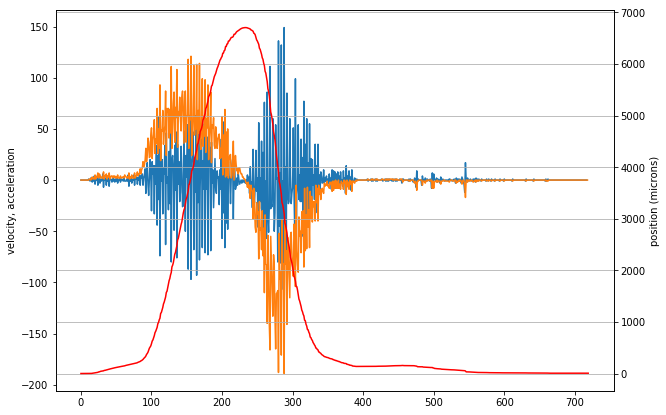

In [12]:
plt.rcParams['figure.figsize'] = [10, 7]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(acc)
ax1.plot(vel)
ax1.set_ylabel('velocity, acceleration')
ax2.plot(y, color='red')
ax2.grid()
ax2.set_ylabel('position (microns)')
plt.show()


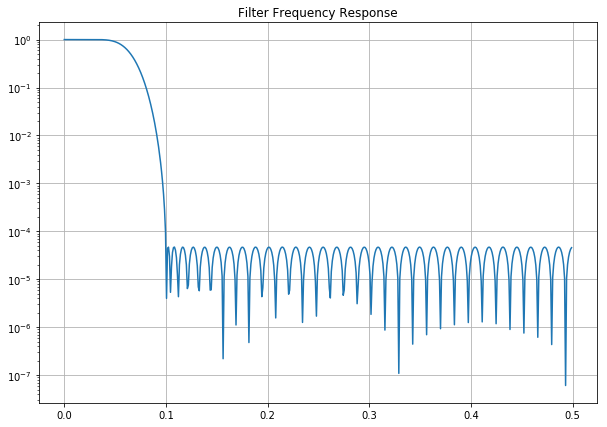

In [23]:
filt_gains = (1, 1, 0, 0)
filt_bands = (0, 0.03, 0.1, 0.49999)
fir_remez = signal.remez(73, filt_bands, filt_gains[::2])

freq, response = signal.freqz(fir_remez)
fig, ax1 = plt.subplots()
plt.semilogy(0.5 * freq / np.pi, np.abs(response))
plt.grid()
plt.title('Filter Frequency Response')
plt.show()

In [6]:
y_f = np.convolve(y, fir_remez)  # _f for  filtered version
vel_f = np.diff(y_f)
acc_f = np.diff(vel_f)

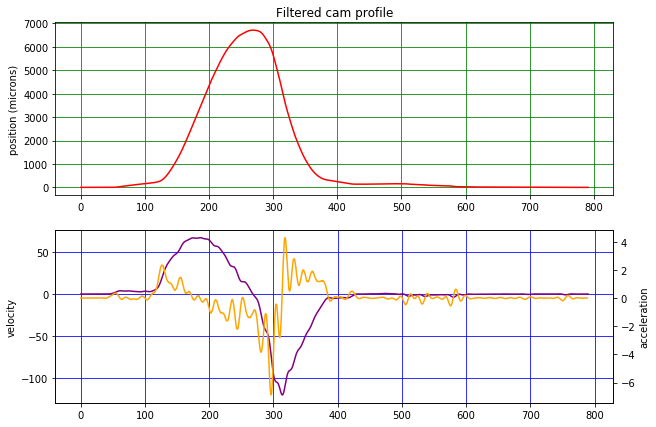

In [29]:
fig, (ax, ax1) = plt.subplots(2)
ax2 = ax1.twinx()

ax.plot(y_f, color='red')
ax.grid(color='green')
ax.set_ylabel('position (microns)')
ax.set_title('Filtered cam profile')

ax1.plot(vel_f, color='purple')
ax1.set_ylabel('velocity')
ax1.grid(color='blue')

ax2.plot(acc_f, color='orange')
ax2.set_ylabel('acceleration')

plt.show()